In [2]:
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt

mnist = input_data.read_data_sets("./mnist_data", one_hot=True)

Extracting ./mnist_data/train-images-idx3-ubyte.gz
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz


num_images:  55000
random index:  7100
label 3


/Users/neitan01/pyvenv/ut/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: This function is deprecated. Please call randint(1, 54999 + 1) instead
  import sys


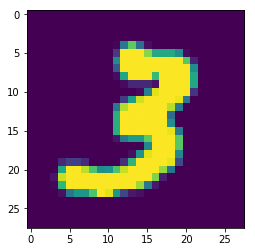

In [3]:
image_set = mnist.train.images
label_set = mnist.train.labels

num_images = image_set.shape[0]
print("num_images: ", num_images)

rand_index = np.random.random_integers(num_images - 1)
print("random index: ", rand_index)

label = label_set[rand_index]
image = image_set[rand_index]
print("label", np.argmax(label))

#print("shape of image: ", image.reshape((28,28)).shape)
image_2d = image.reshape((28,28))
imgplot = plt.imshow(image_2d)
# cv2.imshow('image', image)
# cv2.waitKey(0)

max:  0.99705887


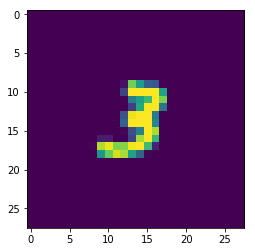

In [58]:
#works for single-channel 2D images only
def image_frame(input, output_dim, fill=0):
    output = np.full(output_dim, fill, dtype=input.dtype)
    delta_x = (input.shape[0] - output_dim[0]) / 2
    delta_y = (input.shape[1] - output_dim[1]) / 2

    if(delta_x >= 0):
        src_x0 = delta_x
        src_x1 = src_x0 + output_dim[0]
        dst_x0 = 0
        dst_x1 = output_dim[0]
    else:
        src_x0 = 0
        src_x1 = input.shape[0]
        dst_x0 = np.absolute(delta_x)
        dst_x1 = output_dim[0] + delta_x
        
    src_x0 = int(np.floor(src_x0))
    src_x1 = int(np.floor(src_x1))
    dst_x0 = int(np.floor(dst_x0))
    dst_x1 = int(np.floor(dst_x1))
    
    if(delta_y >= 0):
        src_y0 = delta_y
        src_y1 = src_y0 + output_dim[1]
        dst_y0 = 0
        dst_y1 = output_dim[1]
    else:
        src_y0 = 0
        src_y1 = input.shape[1]
        dst_y0 = np.absolute(delta_x)
        dst_y1 = output_dim[1] + delta_x

    src_y0 = int(np.floor(src_y0))
    src_y1 = int(np.floor(src_y1))
    dst_y0 = int(np.floor(dst_y0))
    dst_y1 = int(np.floor(dst_y1))
    
    output[dst_x0:dst_x1, dst_y0:dst_y1] = input[src_x0:src_x1, src_y0:src_y1]
    
    return output

res = cv2.resize(image_2d,(int(image_2d.shape[0]*0.5), int(image_2d.shape[1]*0.5)), interpolation = cv2.INTER_LINEAR)
res = image_frame(res, (28, 28))
print("max: ", np.max(res))
imgplot = plt.imshow(res)


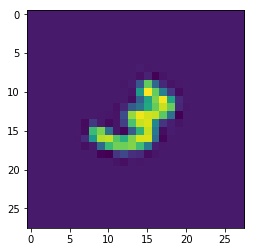

In [59]:
# https://stackoverflow.com/questions/9041681/opencv-python-rotate-image-by-x-degrees-around-specific-point
def rotateImage(image, angle, fill=0):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
    #FIXME: warpAffine is a function of width, height, ordering matters
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=fill)
  return result

def image_rand_rotate(input, angles=(-15, 15), fill=0):
    rand_angle = np.random.uniform(angles[0], angles[1])
    return rotateImage(input, rand_angle, fill)

res = image_rand_rotate(res, (-25, 25))
imgplot = plt.imshow(res)

rand_x -2.379692208024034
rand_y 1.733744963970107


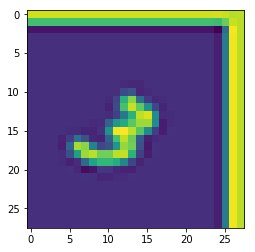

In [60]:
#param disp(x, y)
def image_rand_transl(input, disp=(0.25, 0.25), fill=0):
    h, w = input.shape
    rand_x = np.random.uniform(w * - disp[0], w * disp[0])
    rand_y = np.random.uniform(h * - disp[1], h * disp[1])
    print("rand_x", rand_x)
    print("rand_y", rand_y)
    M = np.float32([[1,0,rand_x],[0,1,rand_y]])
    return cv2.warpAffine(input,M,(w,h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=fill)

res = image_rand_transl(res)
imgplot = plt.imshow(res)

In [ ]:
def image_rand_scale(input, scale=(0.5, 1.2), fill=0):